# **Heart Disease Predictor Model II**

Alba Puig Font, NIU:1636034

Cardiovascular diseases or heart disease are the number one cause of death globally. Heart disease are concertedly contributed by hypertension, diabetes, overweight and unhealthy lifestyles. You can read more on the heart disease statistics and causes for self-understanding. This project covers manual exploratory data analysis and model analysis. The dataset used in this project is UCI Heart Disease dataset, and both data and code for this project are available on my GitHub repository.

With the intention of maximizing the potential of this predictive tool, the study has been analyzed at two levels. A first model (model I) of binary type, which classifies between classes 0 and 1, where 0 corresponds to a healthy person and 1 to a person with heart disease. The second model (model II) is a multiclass model that classifies between classes 0, 1, 2, 3, and 4 corresponding to different levels of disease.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

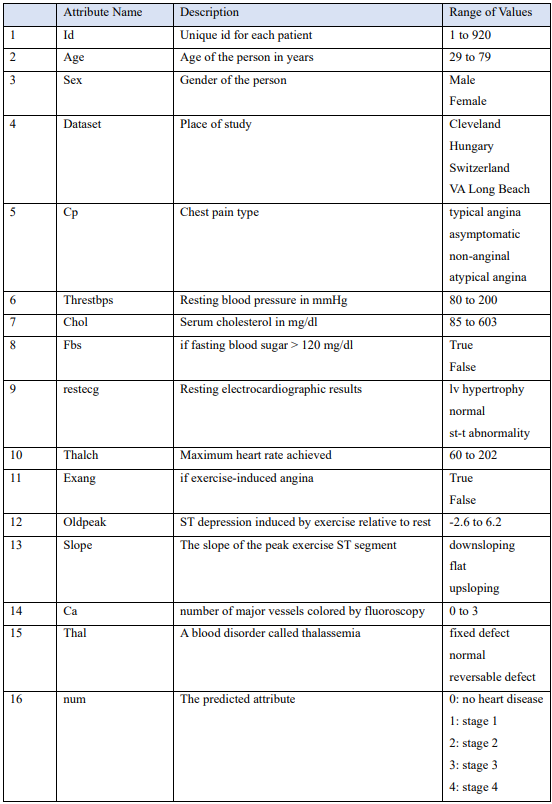

First of all, we remove the Id column as it is a unique value and identify each patient. This will make it easier for us to do the CardEncoder later on and not obtain the wrong values in the metrics.

In [3]:
df.drop(columns="id", inplace= True)

In [4]:
target = 'num'
attributes = [k for k in df.keys() if k!=target]

X = df[attributes]
y = df[target]

# 1. Exploratory Data Analysis (EDA)

Once a data set has been acquired, it is important to carry out an initial exploration of the data to obtain a vision of its distribution, scope and any atypical value. Doing this helps to identify any potential problems with data and guides decisions on data cleaning and preprocessing.

In [5]:
X.shape

(920, 14)

The dataset is comprised of 920 columns, encompassing 14 variables.

In [6]:
# Name of the columns
X.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [7]:
# Check the data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 100.8+ KB


In [8]:
# Summary of descriptive statistics such as mean, standard deviation, minimum, maximum, etc., for all numeric columns in the DataFrame.
d = X.describe()
d

,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


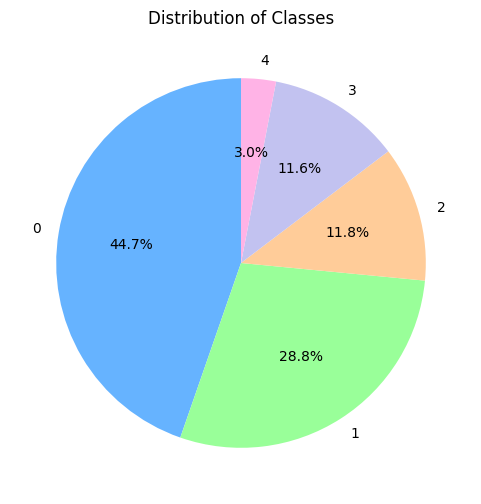

In [9]:
# Count the number of instances for each class
class_counts = df[target].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Distribution of Classes')
plt.show()


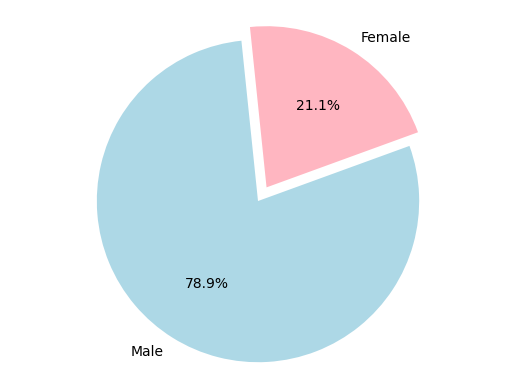

In [10]:
df_sex = X.groupby("sex").size()

my_labels = 'Female','Male'
my_colors = ['lightpink','lightblue']
plt.pie(df_sex.values, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = False, colors=my_colors, explode=(0.1, 0))
plt.axis('equal')
plt.show()

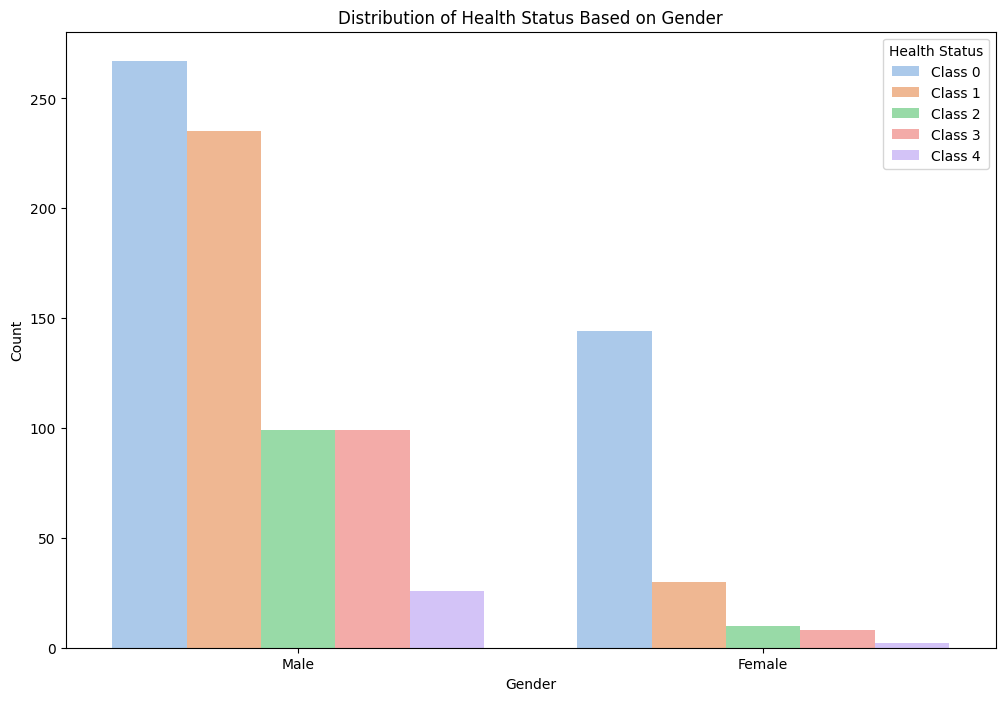

In [11]:
# Assuming you have a column 'num' indicating different health statuses (0, 1, 2, 3, 4)
df_multiclass = df.copy()  # Make a copy of the dataframe to avoid modifying the original

# Create a bar plot for different health statuses based on gender
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', hue='num', data=df_multiclass, palette='pastel')
plt.title('Distribution of Health Status Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Health Status', labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.show()

In general, it seems that men have a higher probability of having a lower health status compared to women, according to classes 0 and 1. However, this trend reverses in classes 2 and 3.

<ipython-input-12-b69211a5dd82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X.corr()


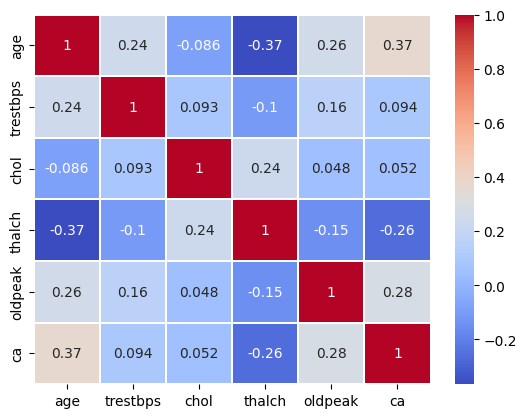

In [12]:
corr=X.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Correlation analysis is a statistical evaluation method used to study the strength of a relationship between two numeric variables.
There is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.


Let's look at the imbalance in the data:

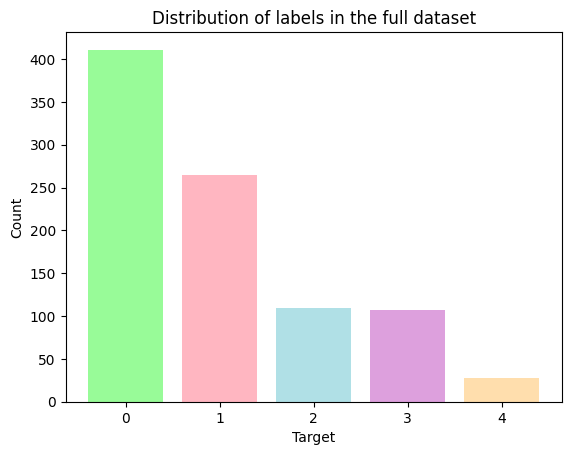

In [13]:
# Create a bar plot showing the distribution of labels.
plt.bar(['0', '1','2','3','4'], y.value_counts(), color=['palegreen', 'lightpink','powderblue','plum','navajowhite'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of labels in the full dataset')
plt.show()

Separate between the training set and the test set:

In [14]:
from sklearn.model_selection import train_test_split

# Separate data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Count the number of unique values in training and testing sets
print('Train labels:', y_train.value_counts())
print('Test labels:', y_test.value_counts())

# Calculate the percentage of each value in the training and test
print('Train percentage:', y_train.value_counts(normalize=True)*100)
print('Test percentage:', y_test.value_counts(normalize=True)*100)

Train labels: 0    329
1    212
2     87
3     86
4     22
Name: num, dtype: int64
Test labels: 0    82
1    53
2    22
3    21
4     6
Name: num, dtype: int64
Train percentage: 0    44.701087
1    28.804348
2    11.820652
3    11.684783
4     2.989130
Name: num, dtype: float64
Test percentage: 0    44.565217
1    28.804348
2    11.956522
3    11.413043
4     3.260870
Name: num, dtype: float64


We can see that the distribution of the train and the test is the same, since they have the same percentage of values 0 and 1. This is what is expected when using stratification, which is a technique to preserve the proportion of classes in subsets of data.


#2. Data preprocessing

Data cleaning is a fundamental step in any machine learning project, as it ensures that data is accurate and reliable for modeling and analysis. When it comes to predicting cardiac diseases, data cleaning involves detecting and correcting any error or inconsistency in the data set that could affect the accuracy of its predictive model.

In [16]:
# Check for null values
def has_nans(df):
    return df.isna().sum().sum()>0

# Print if there are null values in the training set
print(has_nans(X_train))

True


In [17]:
# Displays the number of null values (NaN) for each column.
X_train.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     46
chol         27
fbs          78
restecg       2
thalch       42
exang        42
oldpeak      49
slope       241
ca          479
thal        376
dtype: int64

Once we know that our dataset contains NaNs, we can examine them from the perspective of columns or rows.

Regarding rows, we can determine the percentage of information in each row that contains NaNs.

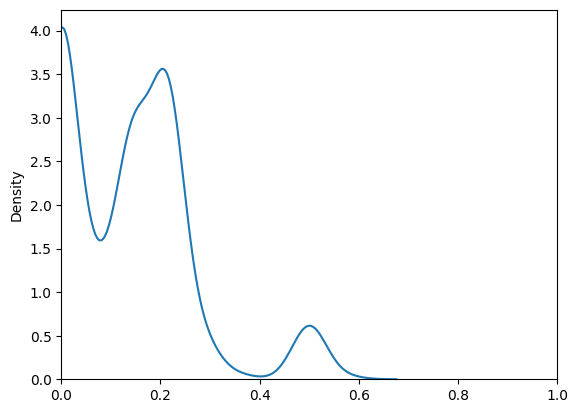

In [18]:
percent_nan_fila = X_train.isna().mean(axis = 1)
percent_nan_fila
sns.kdeplot(percent_nan_fila)
plt.xlim(0,1)
plt.show()

The KDE graph shows two main concentrations of missing values in the data: one around 20% and the other around 60%. This indicates the need to address rows with missing values before further analysis.

Now, graphically represent how the percentages of null values are distributed across the rows of the dataset:

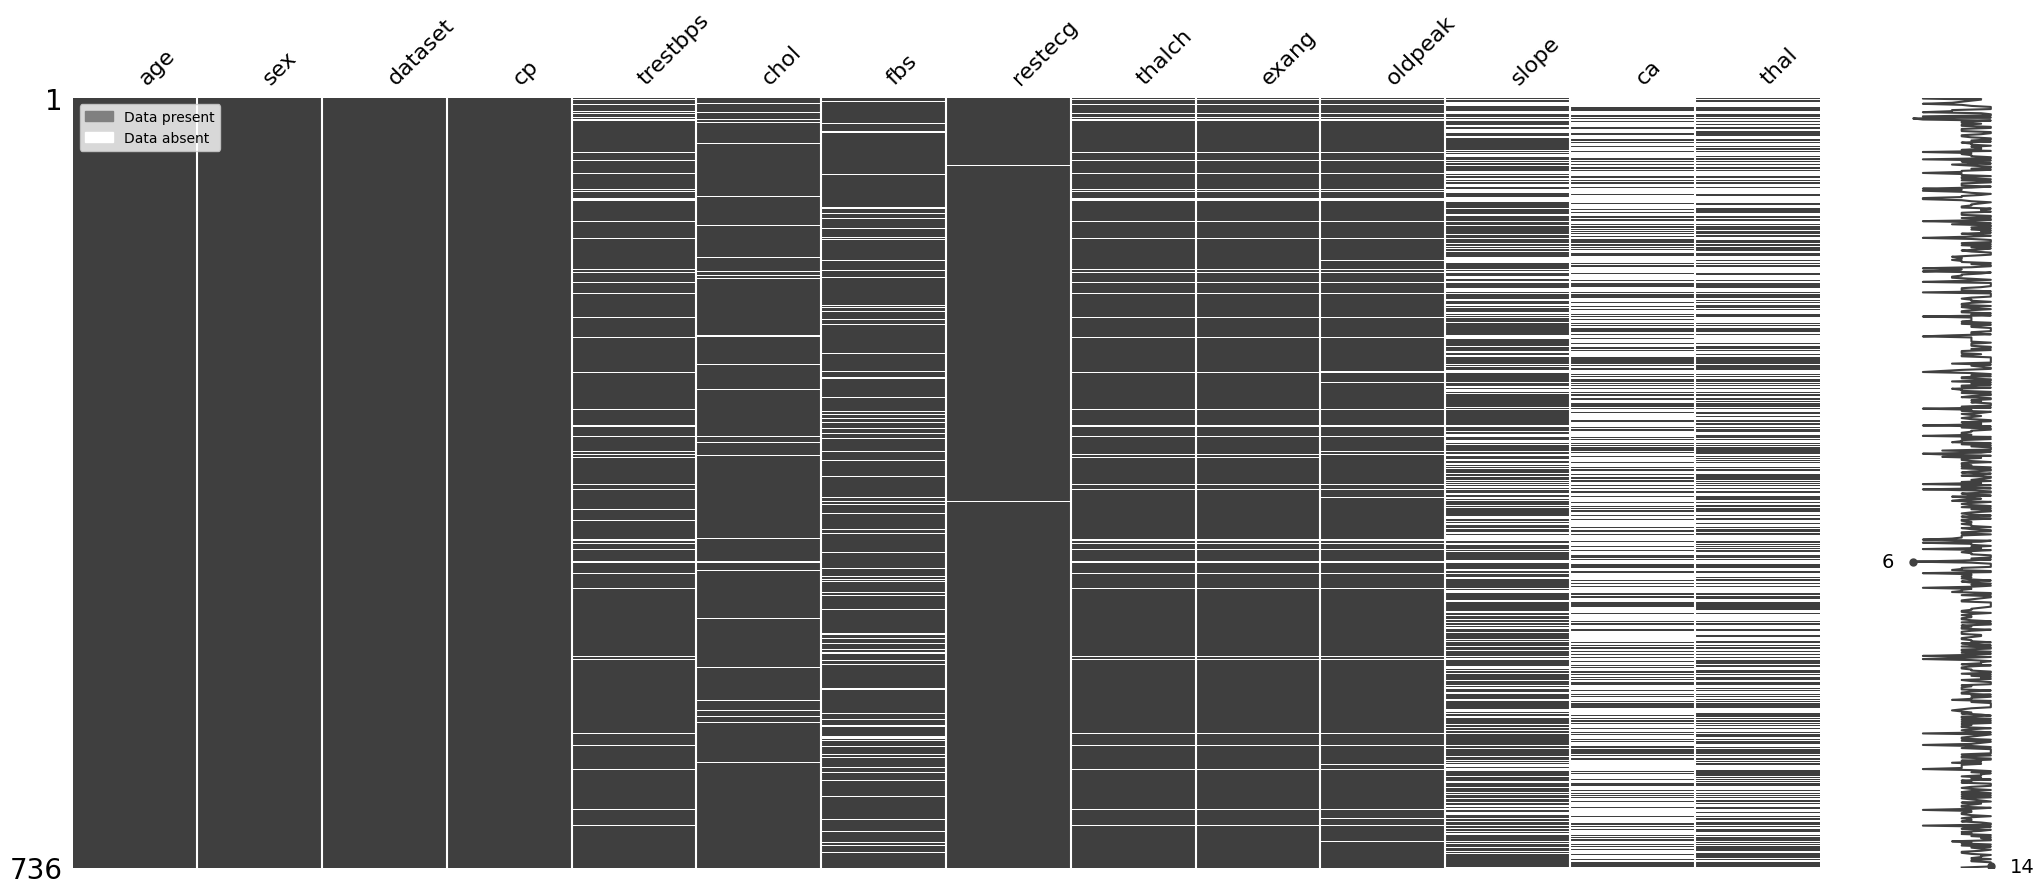

In [19]:
import missingno as msno # To visualize missing value
import matplotlib.patches as mpatches

msno.matrix(X_train)
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(loc= "upper left", handles=[gray_patch, white_patch])

Missing values are represented with horizontal lines. This library provides an informative way to visualize the missing values in each column and to see if there is any correlation between the missing values in different columns.

From the perspective of columns:


In [20]:
def get_percentage_nan_per_column(df):
  # Returns a DataFrame with the percentage of NaNs for each column
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan
# Columns with a high percentage of NaNs need to be removed.

def print_percentage_nan(percentage_nan):
  # Prints the information on the percentage of NaNs for each column
  for col, percentage in percentage_nan.to_dict().items():
    print(col, percentage)
print_percentage_nan(percentage_nan)

age 0.0
sex 0.0
dataset 0.0
cp 0.0
restecg 0.2717391304347826
chol 3.6684782608695654
thalch 5.706521739130435
exang 5.706521739130435
trestbps 6.25
oldpeak 6.657608695652175
fbs 10.597826086956522
slope 32.744565217391305
thal 51.08695652173913
ca 65.08152173913044


Analyze the columns with a low percentage of NaNs. First, it's essential to look at the distribution of NaNs, i.e., how they are distributed throughout the data.

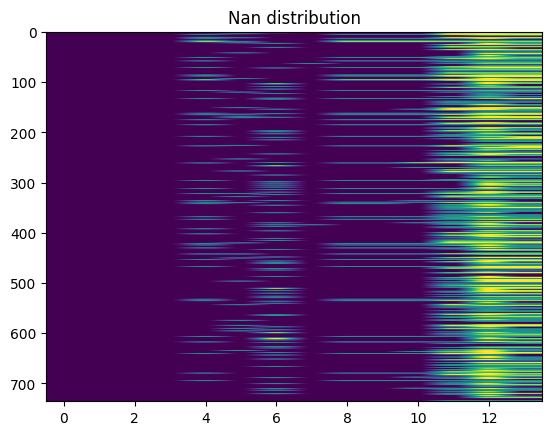

Using 10 cols


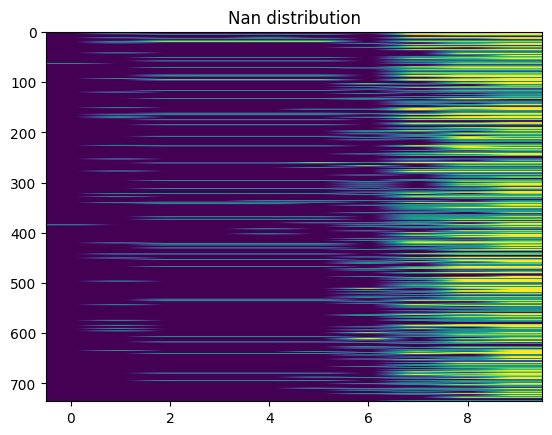

In [21]:
def get_cols_with_na(df):
  isna = df.isna().sum().sort_values()
  isna = isna[isna>0]
  cols = isna.index
  return cols

def filter_df_just_na(df):
  cols = get_cols_with_na(df)
  print (f'Using {len(cols)} cols')
  return df[cols]

def plot_nan_distribution(df,just_na_cols = False):
  if just_na_cols:
    df = filter_df_just_na(df)
  plt.imshow(df.isna(),aspect = 'auto')
  plt.title('Nan distribution')
  plt.show()

plot_nan_distribution(X_train)
plot_nan_distribution(X_train,just_na_cols = True)

The resulting graph is a heat map where the yellow lines represent missing values, and the blue lines represent non-missing values. The x-axis represents the columns of the dataframe, and the y-axis represents the rows. Therefore, we can observe that most NaNs are concentrated in one or two columns.

Now, carry out NaN processing and encoding procedures on the X_train and X_test datasets.

To accomplish this, we design a pipeline, a sequence of data transformations. It first encodes categorical columns using a TargetEncoder, then scales all features to have a mean of 0 and a standard deviation of 1 with a StandardScaler, and finally imputes any missing values using a KNNImputer. This pipeline can be consistently applied to any dataset.

In [22]:
! pip install category-encoders
import category_encoders
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# Define a pipeline

# Create an instance of the TargetEncoder class and specify the columns to transform
encoder = TargetEncoder(cols=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], min_samples_leaf=5)

scaler = StandardScaler()

imp = KNNImputer()

pipe = Pipeline(steps=[ ("encoder", encoder), ("scaler", scaler), ("imputer", imp)])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 714.7 kB/s eta 0:00:00


In [23]:
# Apply the pipeline to X_train
X_train_transformed = pipe.fit_transform(X_train, y_train)

In [24]:
# Apply the pipeline to X_test
X_test_transformed = pipe.transform(X_test)

In [25]:
# Check again if the dataset has NaN values
def has_nans(np_array):
    return np.isnan(np_array).sum() > 0

print("NaN values:", has_nans(X_train_transformed))

NaN values: False


SMOTE is used for addressing class imbalance. It generates synthetic samples for the minority class (the class with fewer instances) by interpolating between existing instances. This is done to balance the distribution of classes and prevent the model from being biased towards the majority class.

In [26]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [27]:
from collections import Counter

# Count the number of unique values in the training and test labels
print(sorted(Counter(y_train_resampled).items()))
print('Train labels:', y_train.value_counts())

[(0, 329), (1, 329), (2, 329), (3, 329), (4, 329)]
Train labels: 0    329
1    212
2     87
3     86
4     22
Name: num, dtype: int64


# Model Selection

The main goal of the project is to predict the occurrence of heart diseases with maximum accuracy. To achieve this, we will try diferent classification algorithms.

The metric we will use to evaluate the performance of the algorithms will be the maximum precision when the recall is greater than 0.95.

The max_precision_95 metric defined for model 1 is not suitable in this case, as it only calculates precision for a binary class. For multiclass classification, we need to use another metric such as F1-Score or the area under the ROC curve (ROCAUC), which consider all classes.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve, f1_score
import time

# Diccionari que emmagatzemarà les prediccions i el temps
preds = {'train': {}, 'test': {}, 'time': {}}

results = {}

# Scorer for multiclass classification (modify based on your metric of interest)
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

# Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(multi_class='ovr')
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
lr_grid_search = GridSearchCV(lr_model, lr_params, scoring=scorer, cv=StratifiedKFold(n_splits=10))
lr_grid_search.fit(X_train_transformed, y_train)
results['LogisticRegression'] = lr_grid_search.best_score_
preds['train']['LogisticRegression'] = lr_grid_search.predict(X_train_transformed)
preds['test']['LogisticRegression'] = lr_grid_search.predict(X_test_transformed)
preds['time']['LogisticRegression'] = time.time() - start_time

# RandomForest
start_time = time.time()
rf_model = RandomForestClassifier()
rf_params = {'max_depth': [11, 15, 17], 'n_estimators': [500, 600, 700]}
rf_grid_search = GridSearchCV(rf_model, rf_params, scoring=scorer, cv=StratifiedKFold(n_splits=5))
rf_grid_search.fit(X_train_transformed, y_train)
results['RandomForest'] = rf_grid_search.best_score_
preds['train']['RandomForest'] = rf_grid_search.predict(X_train_transformed)
preds['test']['RandomForest'] = rf_grid_search.predict(X_test_transformed)
preds['time']['RandomForest'] = time.time() - start_time

# XGBoost
start_time = time.time()
xgb_model = XGBClassifier()
xgb_params = {'max_depth': [4, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 500]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring=scorer, cv=StratifiedKFold(n_splits=10))
xgb_grid_search.fit(X_train_transformed, y_train)
results['XGBoost'] = xgb_grid_search.best_score_
preds['train']['XGBoost'] = xgb_grid_search.predict(X_train_transformed)
preds['test']['XGBoost'] = xgb_grid_search.predict(X_test_transformed)
preds['time']['XGBoost'] = time.time() - start_time

# Get the best hyperparameters after tuning
best_params_lr = lr_grid_search.best_params_
best_params_rf = rf_grid_search.best_params_
best_params_xgb = xgb_grid_search.best_params_

print(f"Best hyperparameters for LogisticRegression: {best_params_lr}")
print(f"Best hyperparameters for RandomForest: {best_params_rf}")
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")
print("\n")

# Display results
print(f"Metric results for each model: {results}")
print(f"Execution time for each model: {preds['time']}")
best_model = max(results, key=results.get)
print(f"The best model according to the chosen metric is: {best_model} with a score of {results[best_model]}")


Best hyperparameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best hyperparameters for RandomForest: {'max_depth': 11, 'n_estimators': 600}
Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


Metric results for each model: {'LogisticRegression': 0.3440495320122473, 'RandomForest': 0.37909709429990107, 'XGBoost': 0.40220903928045726}
Execution time for each model: {'LogisticRegression': 1.685302972793579, 'RandomForest': 83.30815005302429, 'XGBoost': 190.5384624004364}
The best model according to the chosen metric is: XGBoost with a score of 0.40220903928045726


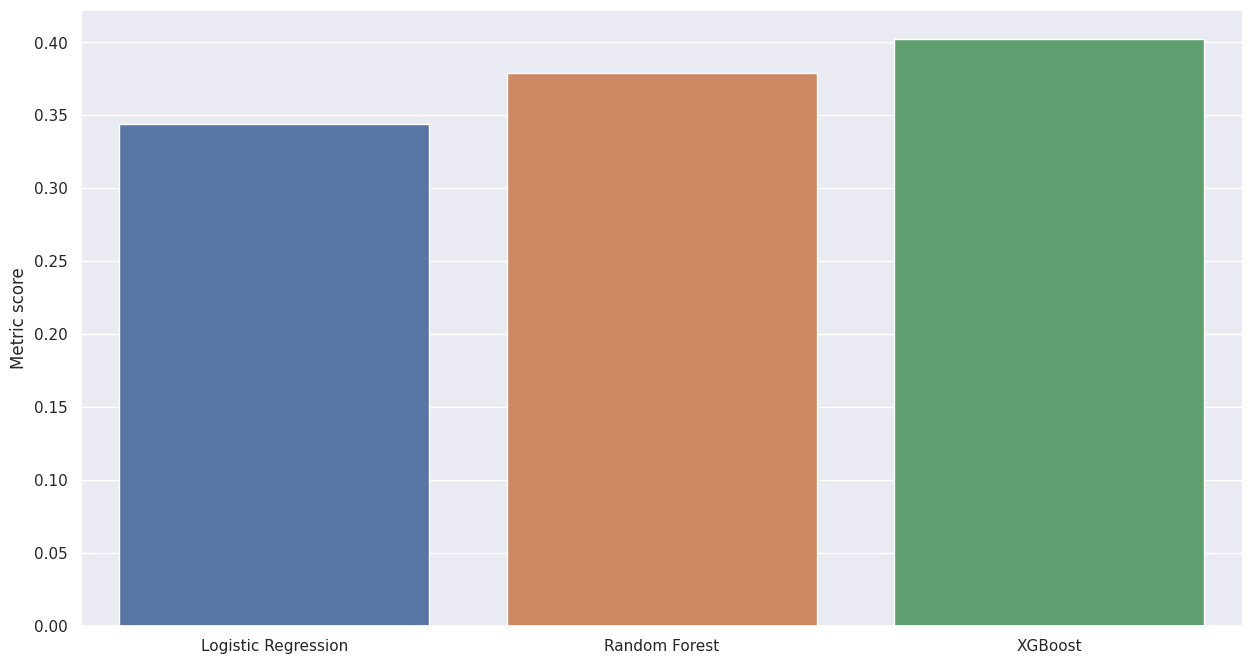

In [29]:
scores = [results['LogisticRegression'], results['RandomForest'], results['XGBoost']]
algorithms = ["Logistic Regression","Random Forest","XGBoost"]
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Metric score")

sns.barplot(x=algorithms, y=scores)
plt.show()

XGBoost shows a slightly higher F1-Score, followed by Random Forest, while Logistic Regression has the lowest score. These data suggest that, for this specific dataset and the F1-Score metric, XGBoost is performing better than the other two algorithms.


In [30]:
# Import the sklearn.metrics library for the precision_recall_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

def plot_analysis_results(X_test_transformed, y_test, y_prob, y_pred):

    # Convert the variable y_test into a binary matrix
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
    y_score = xgb_grid_search.predict_proba(X_test_transformed)

    precision = dict()
    recall = dict()
    for i in range(5):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()


    # Create a figure with 5 subplots, one for each class
    fig, axs = plt.subplots(5, figsize=(10, 20))

    # For each class, create a scatter plot of probability vs prediction in its own subplot
    for i in range(5):
        scatter = axs[i].scatter(y_prob[:, i], y_pred==i, c=y_test==i,cmap='viridis', label=f'Class {i}')
        axs[i].set_title(f'Prediction vs. Probability for Class {i}')
        axs[i].set_xlabel('Probability')
        axs[i].set_ylabel('Prediction')
        axs[i].legend()

        # Add a color bar to represent the prediction labels
        cbar = plt.colorbar(scatter, ax=axs[i])
        cbar.set_label('Etiqueta Real')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

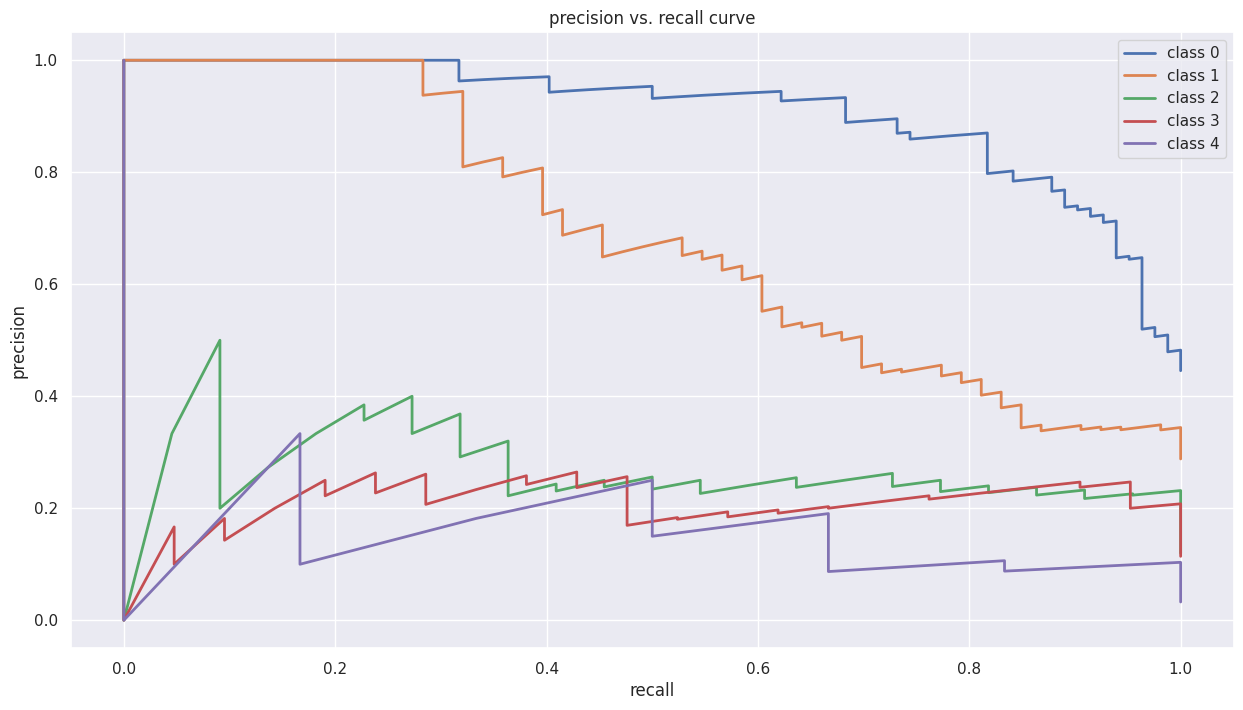

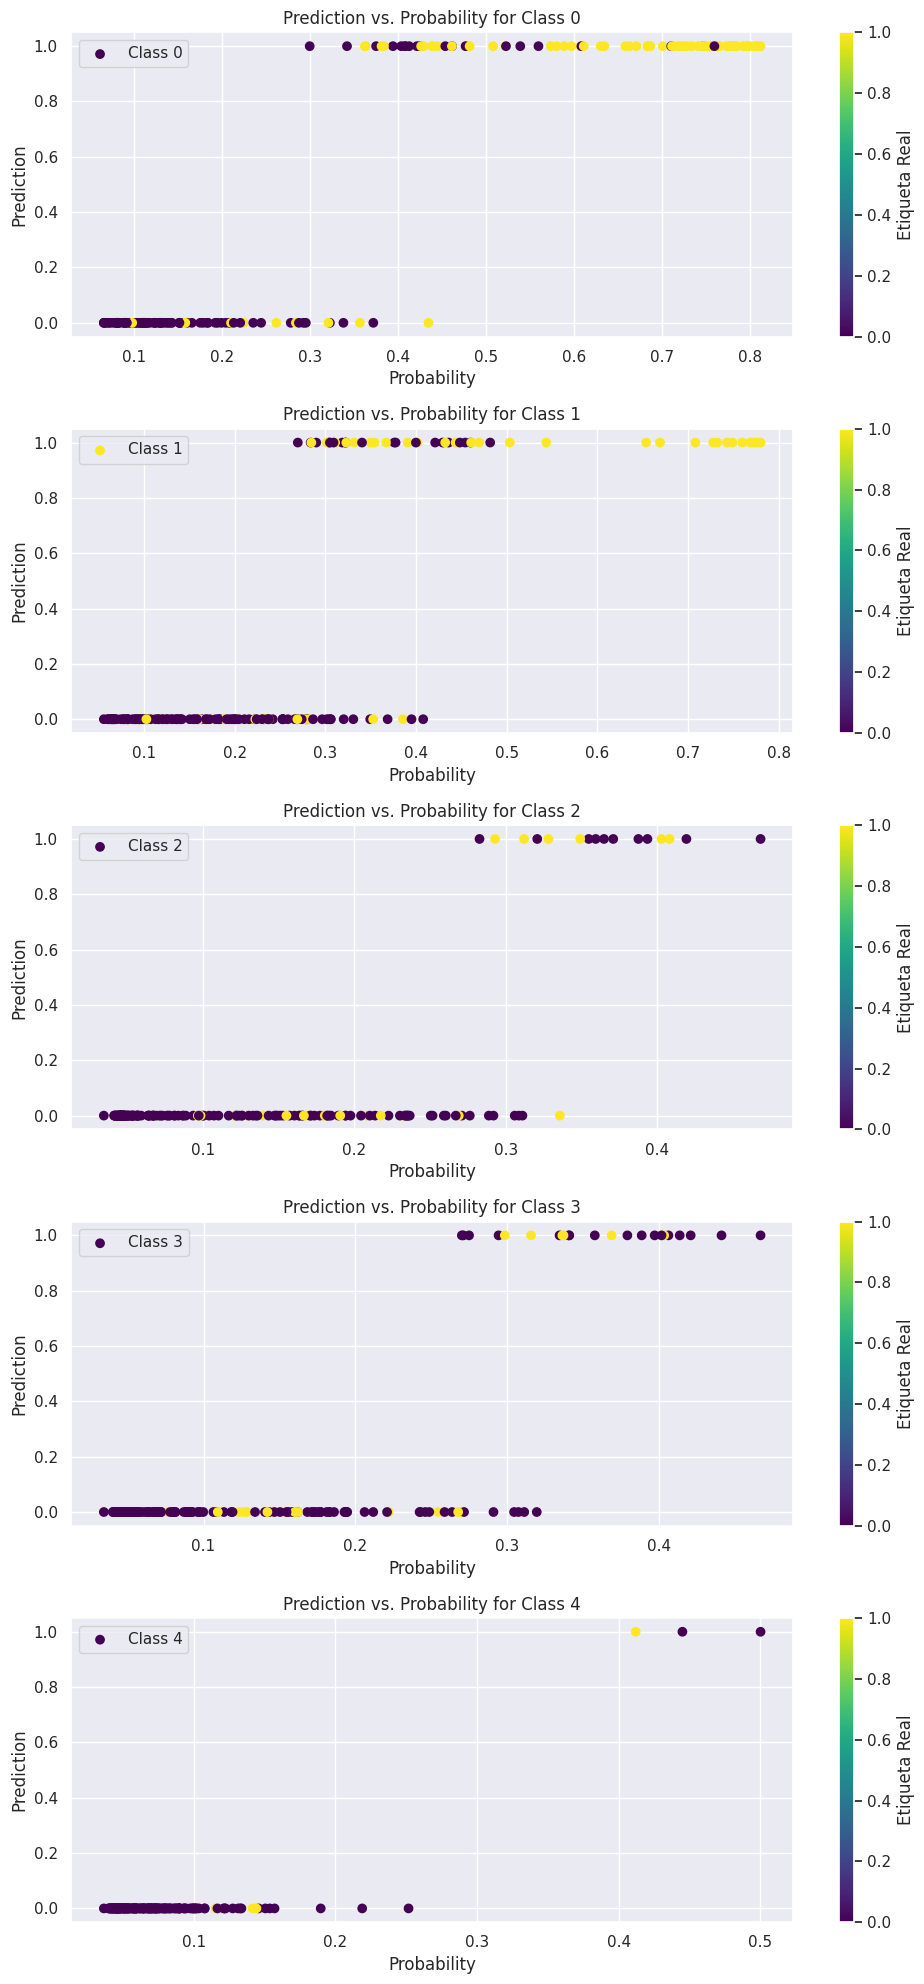

In [31]:
# Get the probabilities of the predictions
y_prob = xgb_grid_search.predict_proba(X_test_transformed)

# Get the predictions
y_pred = xgb_grid_search.predict(X_test_transformed)

plot_analysis_results(X_test_transformed, y_test, y_prob, y_pred)

The PR curves are irregular and do not follow a smooth pattern; this is due to class imbalance, where classes 2, 3, and 4 have far fewer instances than classes 0 and 1. This imbalance affects precision and recall as the model struggles to learn the characteristics of the less represented classes.


**CONFUSION MATRIX**

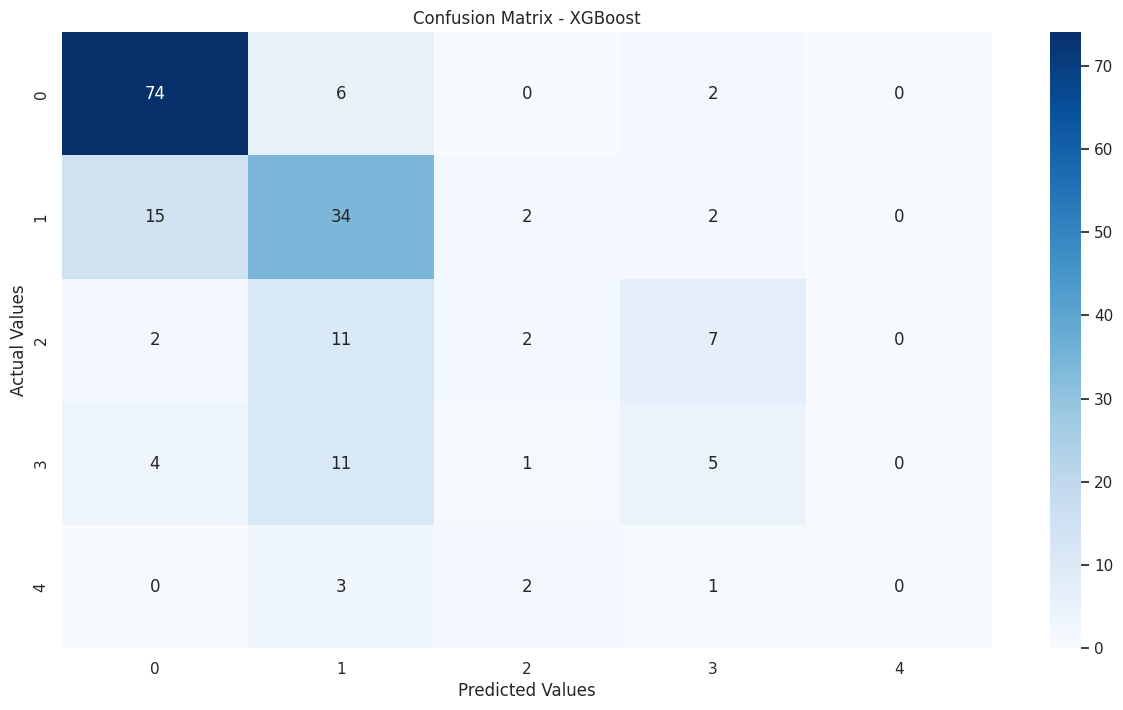

In [32]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

best_model = lr_grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".0f",cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix - XGBoost')
plt.show()



- There is a significant variation in the number of instances for each class, which can impact the interpretation of performance metrics. Classes 1 and 2 have a more prominent presence than the other classes.
- Class 4 seems to be the least frequent and also poses challenges, with a high number of false positives and false negatives.


**CLASSIFICATION REPORT**

In [33]:
from sklearn.metrics import classification_report

# Generem el classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.52      0.64      0.58        53
           2       0.29      0.09      0.14        22
           3       0.29      0.24      0.26        21
           4       0.00      0.00      0.00         6

    accuracy                           0.62       184
   macro avg       0.38      0.37      0.36       184
weighted avg       0.57      0.62      0.59       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: It is the proportion of true positives relative to the total positive predictions.

- Precision is higher for Class 0 (0.78), indicating that when the model predicts this class, it is likely to be correct.
- Precision decreases in classes like Class 2 (0.38) and Class 3 (0.26), indicating more false positives in these predictions.

Recall: It is the proportion of true positives that have been correctly identified by the model.

- Recall is higher for Class 0 (0.85), indicating that the model identifies this class well.
- Recall is lower for Class 2 (0.27) and Class 4 (0.17), indicating that the model struggles to correctly identify these classes.

F1-score: It is a harmonic mean of precision and recall, providing a balanced metric.

- F1-score is higher for Class 0 (0.81) and decreases for the other classes.

Support: It is the actual number of instances for each class in the test set.

- Class 0 has the highest support (82), while Class 4 has the lowest support (6).

The overall accuracy of the model is 62%, indicating the total proportion of correct predictions for all classes.


**MODEL EXPLAINABILITY**

Model explainability is crucial for understanding its internal workings and knowing which features contribute most to predictions. A common tool for model explainability is SHAP (SHapley Additive exPlanations), which provides a unified measure of feature importance.

Let's see what the SHAP values tell us. These work by showing the influence of the values of every variable in a single row, compared to their baseline values

In [34]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


[11:30:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


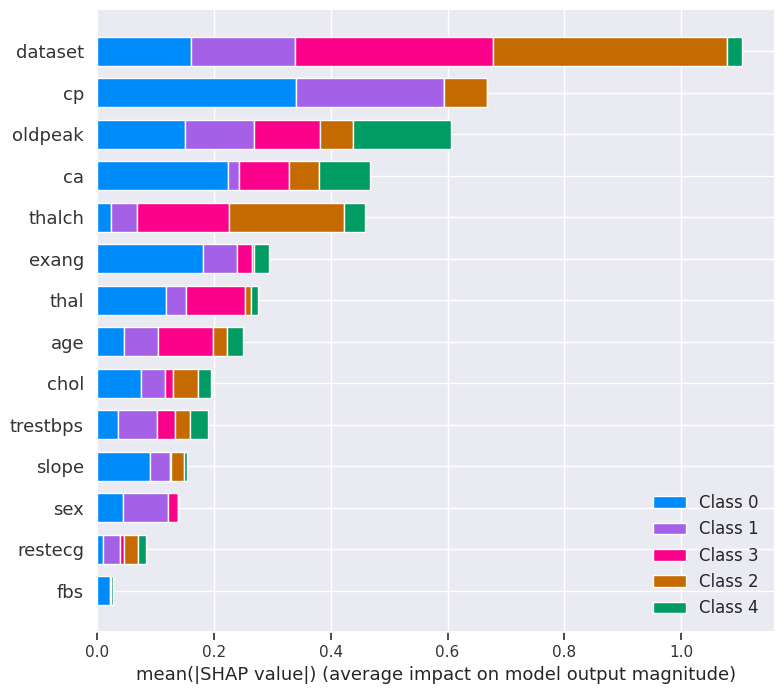

In [35]:
import shap

# Create a linear explainer for the logistic regression model
millor_model = xgb_grid_search.best_estimator_

explainer = shap.TreeExplainer(millor_model)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=list(X.columns), plot_type="bar")

In a multiclass model, SHAP values are calculated for each class, and the summary plot can show the impact of features for each class individually.

The horizontal bar plot displays the average impact (mean(SHAP value)) of various features (such as "cp," "oldpeak," "ca," "thal," etc.) on the magnitude of the model output. Bars of different colors represent the impact for 5 different classes (Class 0, Class 1, Class 2, Class 3, and Class 4). The length and color of the bars vary, indicating different mean SHAP values and classes for each feature. This suggests that some features have a greater impact on certain classes than others.


In the results analysis, the LIME (Local Interpretable Model-agnostic Explanations) library can provide a visual representation of the relative importance of features for predicting the selected instance. The most prominent features are displayed along with their contributions, indicating how each variable influences the final prediction of the model.


In [36]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f6f98f0c890fff250034970a832eeb578e09ab52175e38135af198a004023a93
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Next, let's pick out individual patients and see how the different variables are affecting their outcomes,

In [37]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(X_train_transformed, feature_names=X_test.columns, class_names=['0','1','2','3','4'])

# Explain an individual prediction
lime_exp = lime_explainer.explain_instance(X_test_transformed[125], millor_model.predict_proba, num_features=6, top_labels=5)
lime_exp.show_in_notebook(show_table=True, show_all=False)

------------------------------------------------------------------------------------------------------

**STREAMLIT APP**

In [38]:
from joblib import dump

dump(xgb_grid_search.best_estimator_, 'model_2.joblib')

['model_2.joblib']